# Librerías

In [38]:
pip install pandas matplotlib scikit-learn numpy

## Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import random


# ¿Qué necesita un frijol para crecer?



1. Nitrógeno (N) 92-102 Kg/ha
2. Fósforo (P) 4-14 Kg/ha
3. Potasio (K) 88-98 Kg/ha
4. Calcio (Ca) 49-59 Kg/ha
5. Magnesio (Mg) 13-23 Kg/ha
6. Azufre (S) 20-30 Kgh/ha
7. Ph 5.0-7.5


**Nota:** Kg/ha = Kilogramo por hectárea



> [Fuente](https://www.fao.org/3/a1359s/a1359s03.pdf)


# Utils

Funciones que nos ayudan a realizar distintos procedimientos a lo largo del programa



## Porcentajes de Supervivencia

In [40]:
random.seed(42)

def generate_high_survival_chances():
  """Generates a random number between 0.7 and 1.0."""
  return random.uniform(0.7, 1.0)

def generate_low_survival_chances():
  """Generates a random number between 0.2 and 0.45."""
  return random.uniform(0.3, 0.45)

def calculate_survival_chances(row,features_data):
  total_weight = 0
  weighted_sum = 0

  for feature, value in row.items():
    if int(value) in range(features_data[feature]["mean_range"][0],features_data[feature]["mean_range"][1]):
      weighted_sum +=(features_data[feature]["weight"]*generate_high_survival_chances())
    else:
      weighted_sum +=(features_data[feature]["weight"]*generate_low_survival_chances())

    total_weight+= features_data[feature]["weight"]

  return weighted_sum/total_weight






# Generar Datos

Definimos las features, los pesos, las medias y la desviación estándar

In [41]:
features_data = {
    "N (Kg/ha)": {"mean_range": (90, 100), "weight": 3},
    "P (Kg/ha)": {"mean_range": (2, 16), "weight": 5},
    "K (Kg/ha)": {"mean_range": (86, 100), "weight": 2},
    "Ca (Kg/ha)": {"mean_range": (47, 61), "weight": 2},
    "Mg (Kg/ha)": {"mean_range": (11, 25), "weight": 8},
    "S (Kg/ha)": {"mean_range": (18, 32), "weight": 7},
    "pH": {"mean_range": (3, 10), "weight": 9}
}

features =  features_data.keys()
means = [97, 9, 93, 54, 18, 25, 6.5]
sigma = 7
RECORDS_NUMBER = 700000
df = pd.DataFrame(columns = features)

## Generar las features
Generamos los valores de las features creando una distribución normal partiendo de las medias y desviación estándar previamente definidas


In [42]:
for feature, mean in zip(features, means):
  s = np.random.normal(mean, sigma, RECORDS_NUMBER)
  df[feature] = s

df.describe()

,N (Kg/ha),P (Kg/ha),K (Kg/ha),Ca (Kg/ha),Mg (Kg/ha),S (Kg/ha),pH
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,96.988721,9.002544,93.010685,54.015800,17.997663,25.005702,6.511149
std,7.002030,6.997603,6.990198,7.005322,6.996264,7.001572,7.004739
min,64.569749,-22.136023,58.070691,21.930967,-13.430258,-12.334253,-24.010719
25%,92.262709,4.284488,88.307423,49.285300,13.287226,20.290621,1.794821
50%,96.987791,9.008350,93.014664,54.011671,18.006768,25.015023,6.510466
75%,101.720593,13.725664,97.726233,58.750534,22.716604,29.739655,11.222657
max,134.261079,40.845934,126.661646,88.280896,51.004021,56.132552,38.800336


## Añadir la variable objetivo

<Axes: >

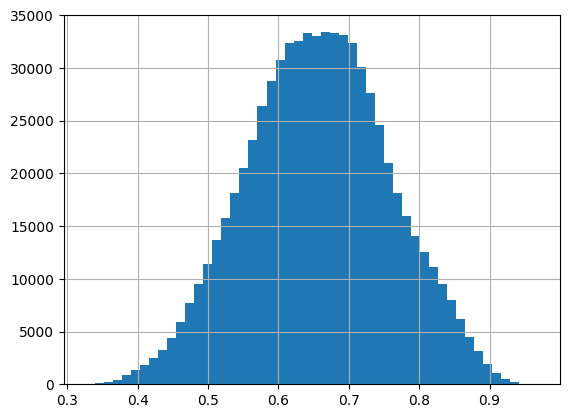

In [43]:
df['survival'] = df.apply(lambda row: calculate_survival_chances(row, features_data), axis=1)
df['survival'].hist(bins=50)

# Análisis Exploratorio

## Información Básica

Se puede observar que **no** existen valores nulos y que **todos** son numéricos

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   N (Kg/ha)   700000 non-null  float64
 1   P (Kg/ha)   700000 non-null  float64
 2   K (Kg/ha)   700000 non-null  float64
 3   Ca (Kg/ha)  700000 non-null  float64
 4   Mg (Kg/ha)  700000 non-null  float64
 5   S (Kg/ha)   700000 non-null  float64
 6   pH          700000 non-null  float64
 7   survival    700000 non-null  float64
dtypes: float64(8)
memory usage: 42.7 MB


## Descripción

La media de supervivencia es de el 65%

In [45]:
df.describe()

,N (Kg/ha),P (Kg/ha),K (Kg/ha),Ca (Kg/ha),Mg (Kg/ha),S (Kg/ha),pH,survival
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,96.988721,9.002544,93.010685,54.015800,17.997663,25.005702,6.511149,0.656761
std,7.002030,6.997603,6.990198,7.005322,6.996264,7.001572,7.004739,0.100814
min,64.569749,-22.136023,58.070691,21.930967,-13.430258,-12.334253,-24.010719,0.326675
25%,92.262709,4.284488,88.307423,49.285300,13.287226,20.290621,1.794821,0.586703
50%,96.987791,9.008350,93.014664,54.011671,18.006768,25.015023,6.510466,0.656895
75%,101.720593,13.725664,97.726233,58.750534,22.716604,29.739655,11.222657,0.726298
max,134.261079,40.845934,126.661646,88.280896,51.004021,56.132552,38.800336,0.967581


## Distribución de los Datos

La población de las features se encuentra **normalmente** distribuida. Además, las escalas de las diferentes variables son diferentes entre sí

array([[<Axes: title={'center': 'N (Kg/ha)'}>,
        <Axes: title={'center': 'P (Kg/ha)'}>,
        <Axes: title={'center': 'K (Kg/ha)'}>],
       [<Axes: title={'center': 'Ca (Kg/ha)'}>,
        <Axes: title={'center': 'Mg (Kg/ha)'}>,
        <Axes: title={'center': 'S (Kg/ha)'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'survival'}>, <Axes: >]], dtype=object)

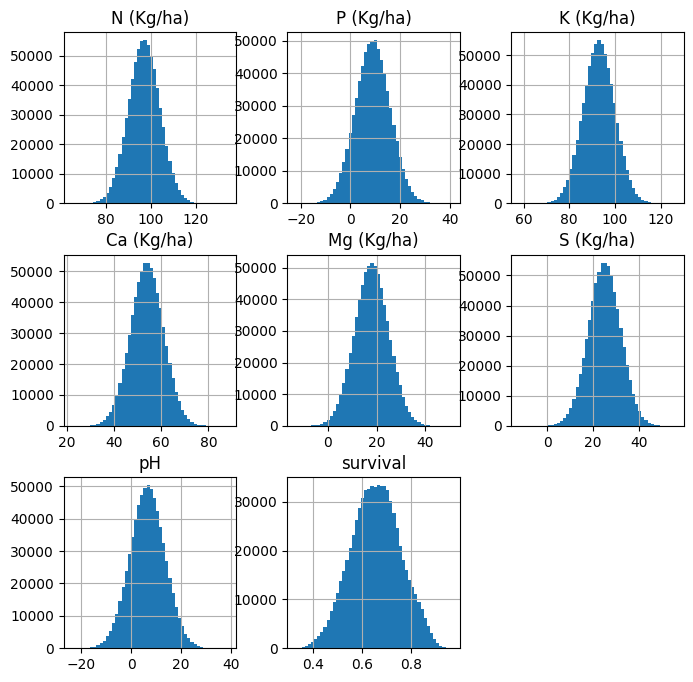

In [46]:
df.hist(bins=50, figsize=(8,8))

## Correlación

La correlación que existe entre las features y la variable objetivo


In [47]:
df.corr()

,N (Kg/ha),P (Kg/ha),K (Kg/ha),Ca (Kg/ha),Mg (Kg/ha),S (Kg/ha),pH,survival
N (Kg/ha),1.000000,0.001851,0.000163,-0.001538,0.000500,0.001712,-0.001161,-0.048574
P (Kg/ha),0.001851,1.000000,-0.001404,-0.000492,0.000586,0.001601,-0.002281,0.001285
K (Kg/ha),0.000163,-0.001404,1.000000,-0.002946,0.000858,0.000395,-0.001118,-0.002284
Ca (Kg/ha),-0.001538,-0.000492,-0.002946,1.000000,-0.000228,-0.000412,0.000024,-0.000662
Mg (Kg/ha),0.000500,0.000586,0.000858,-0.000228,1.000000,0.001902,0.000325,0.000096
S (Kg/ha),0.001712,0.001601,0.000395,-0.000412,0.001902,1.000000,-0.000481,-0.001265
pH,-0.001161,-0.002281,-0.001118,0.000024,0.000325,-0.000481,1.000000,0.002054
survival,-0.048574,0.001285,-0.002284,-0.000662,0.000096,-0.001265,0.002054,1.000000


# Preprocesamiento de los datos

In [48]:
preprocessed_df = df.copy()

## Escalado

Garantizamos que todos los valores de las diferentes features se encuentren entre 0 y 1.

array([[<Axes: title={'center': 'N (Kg/ha)'}>,
        <Axes: title={'center': 'P (Kg/ha)'}>,
        <Axes: title={'center': 'K (Kg/ha)'}>],
       [<Axes: title={'center': 'Ca (Kg/ha)'}>,
        <Axes: title={'center': 'Mg (Kg/ha)'}>,
        <Axes: title={'center': 'S (Kg/ha)'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'survival'}>, <Axes: >]], dtype=object)

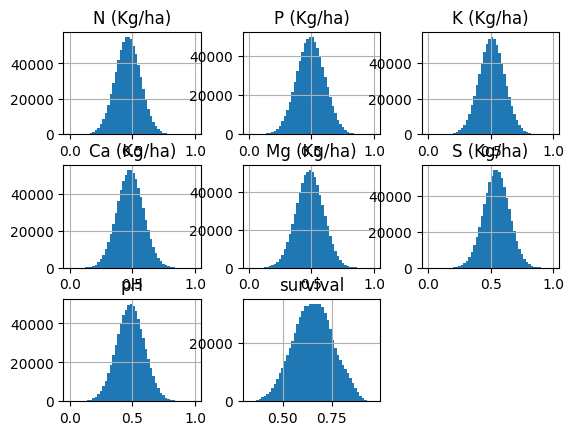

In [49]:
x = df.drop(columns=["survival"])

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(x)

preprocessed_df = pd.DataFrame(scaled_data, columns=x.columns)

preprocessed_df["survival"] = df["survival"]

preprocessed_df.hist(bins=50)

## Sample
Debido a la gran cantidad de registros que posee el dataset, se usa solo una parte del mismo para el entrenamiento

(50000, 8)


array([[<Axes: title={'center': 'N (Kg/ha)'}>,
        <Axes: title={'center': 'P (Kg/ha)'}>,
        <Axes: title={'center': 'K (Kg/ha)'}>],
       [<Axes: title={'center': 'Ca (Kg/ha)'}>,
        <Axes: title={'center': 'Mg (Kg/ha)'}>,
        <Axes: title={'center': 'S (Kg/ha)'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'survival'}>, <Axes: >]], dtype=object)

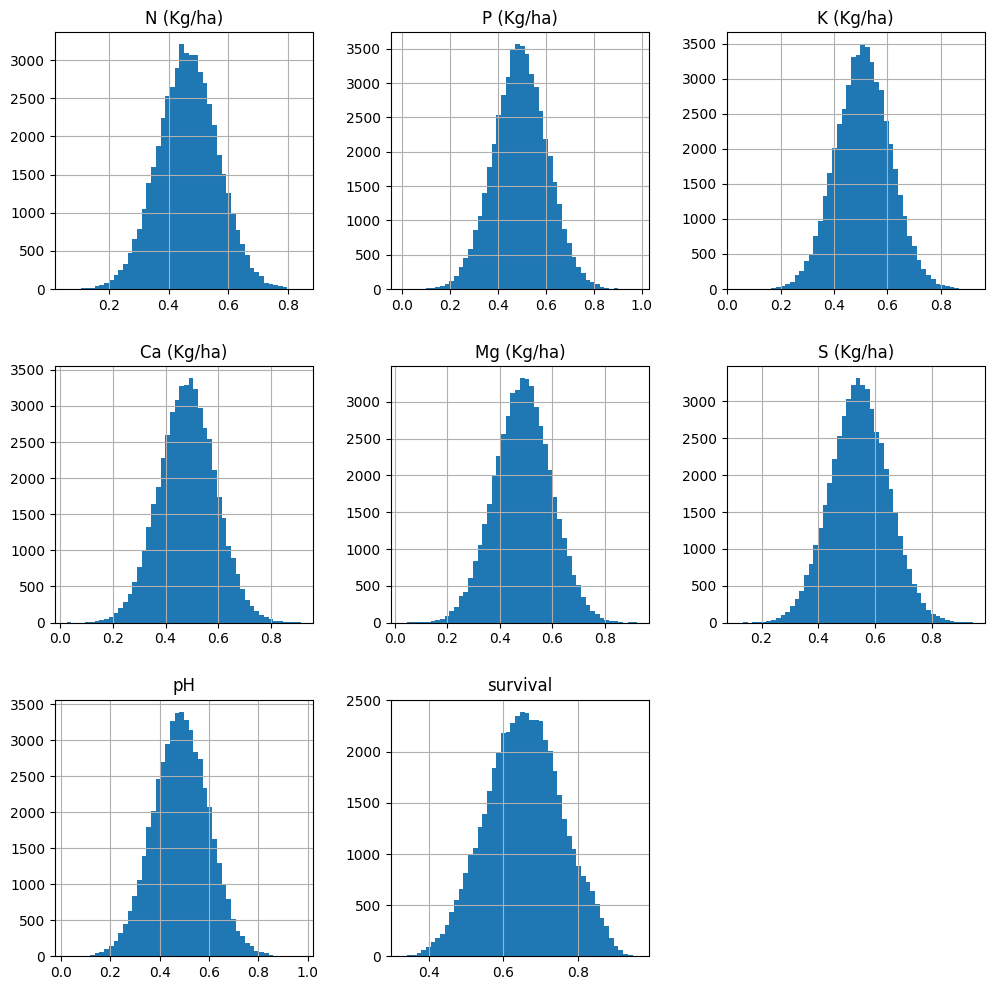

In [50]:
preprocessed_df = preprocessed_df.sample(n=50000, random_state=42)
print(preprocessed_df.shape)
preprocessed_df.hist(bins=50, figsize=(12,12))

# Descartando las features menos significativas


## Random Forest Regressor

In [51]:
X = preprocessed_df.drop(columns=["survival"]).to_numpy()
y = preprocessed_df["survival"].to_numpy()


random_forest_cls = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
random_forest_cls.fit(X, y)

RandomForestRegressor(max_depth=15, random_state=42)

## Feature Importances

Como se puede observar, las siguientes variables no influyen significativamente al momento de hacer la predicción:

1. K
2. Ca
3. N

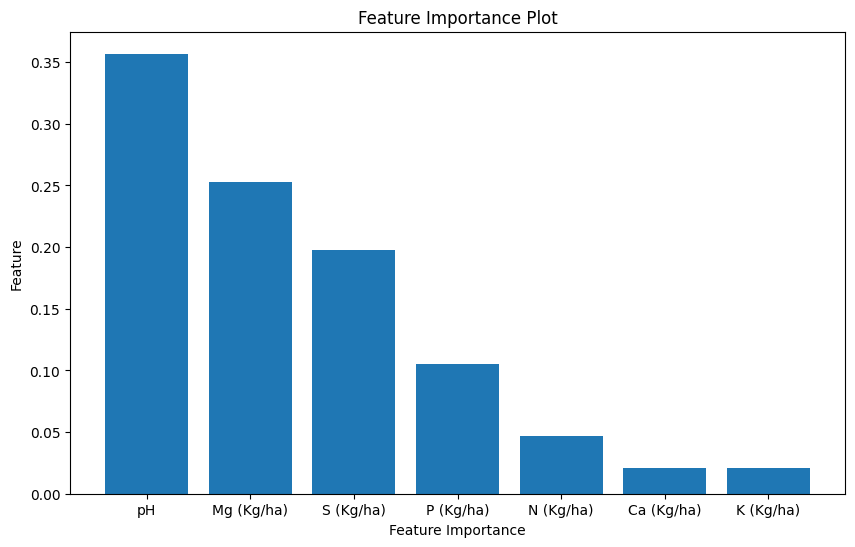

In [52]:
feature_importances = random_forest_cls.feature_importances_
feature_names = preprocessed_df.drop(columns=["survival"]).columns

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names,sorted_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

In [53]:
non_essential_features = ["N (Kg/ha)", "Ca (Kg/ha)","K (Kg/ha)"]

training_df = preprocessed_df.drop(columns=non_essential_features)

# Entrenamiento

Entrenamos el modelo con las características más significativas

## Split

In [54]:
X = training_df.drop(columns=["survival"]).to_numpy()
y = training_df["survival"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Random Forest Regressor

In [55]:
random_forest_cls = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
random_forest_cls.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=42)

# Evaluando con la división del dataset

In [56]:
y_pred = random_forest_cls.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE)", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.0332872991895533
Mean Absolute Percentage Error (MAPE) 0.05182838223487905
Mean Squared Error (MSE): 0.0017128586584229386
Root Mean Squared Error (RMSE): 0.04138669663579033
R-squared (R2) Score: 0.8328131520008513


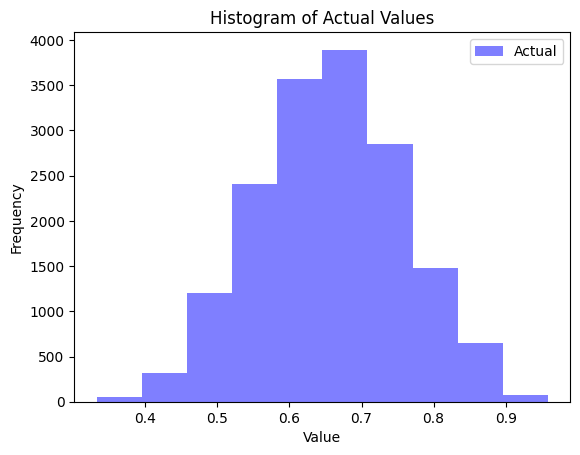

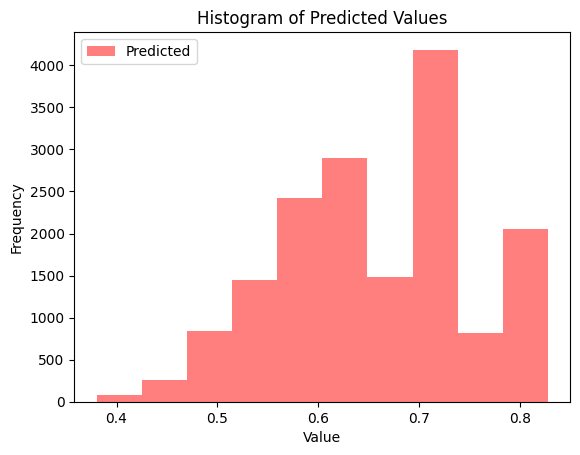

In [57]:
plt.hist(y_test, bins=10, color='blue', alpha=0.5, label='Actual')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Values')
plt.legend()
plt.show()


plt.hist(y_pred, bins=10, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')
plt.legend()
plt.show()

# Evaluando con datasets personalizados

## Utils

In [58]:
random.seed(52)

def generate_values_whitin(min,max)->list:
  return random.uniform(min,max)


## Extraemos las features más importantes junto con su información

In [59]:
features = features_data.keys()
significant_features = [feature for feature in features if feature not in non_essential_features]
significant_features

['P (Kg/ha)', 'Mg (Kg/ha)', 'S (Kg/ha)', 'pH']

In [60]:
significant_features_data = {feature:features_data[feature] for feature in significant_features}
significant_features_data

{'P (Kg/ha)': {'mean_range': (2, 16), 'weight': 5},
 'Mg (Kg/ha)': {'mean_range': (11, 25), 'weight': 8},
 'S (Kg/ha)': {'mean_range': (18, 32), 'weight': 7},
 'pH': {'mean_range': (3, 10), 'weight': 9}}

## Poca probabilidad de supervivencia

### Generando registros

In [61]:
means = [0, 2, 5,0]
sigma = 1.5
RECORDS_NUMBER = 500
low_survival_changes_df = pd.DataFrame(columns = significant_features)

for feature, mean in zip(significant_features, means):
  s = np.random.normal(mean, sigma, RECORDS_NUMBER)
  low_survival_changes_df[feature] = s

low_survival_changes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   P (Kg/ha)   500 non-null    float64
 1   Mg (Kg/ha)  500 non-null    float64
 2   S (Kg/ha)   500 non-null    float64
 3   pH          500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


<Axes: >

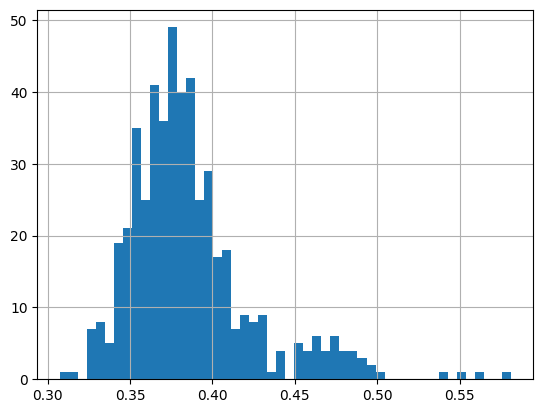

In [62]:
low_survival_changes_df['survival'] = low_survival_changes_df.apply(lambda row: calculate_survival_chances(row, significant_features_data), axis=1)
low_survival_changes_df['survival'].hist(bins=50)

## Mucha probabilidad de supervivencia

### Generar los registros

In [63]:
means = [8, 15, 25,6]
sigma = 1.5
RECORDS_NUMBER = 500
high_survival_changes_df = pd.DataFrame(columns = significant_features)

for feature, mean in zip(significant_features, means):
  s = np.random.normal(mean, sigma, RECORDS_NUMBER)
  high_survival_changes_df[feature] = s

high_survival_changes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   P (Kg/ha)   500 non-null    float64
 1   Mg (Kg/ha)  500 non-null    float64
 2   S (Kg/ha)   500 non-null    float64
 3   pH          500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


<Axes: >

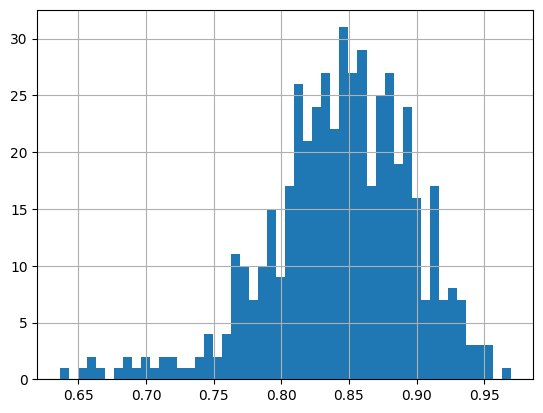

In [64]:
high_survival_changes_df['survival'] = high_survival_changes_df.apply(lambda row: calculate_survival_chances(row, significant_features_data), axis=1)
high_survival_changes_df['survival'].hist(bins=50)

## Escalando los datos

In [65]:
scaler = MinMaxScaler()

low_survival_changes_scaled = scaler.fit_transform(low_survival_changes_df.drop(columns=["survival"]))
high_survival_changes_scaled = scaler.fit_transform(high_survival_changes_df.drop(columns=["survival"]))

low_survival_changes_scaled_df = pd.DataFrame(low_survival_changes_scaled, columns=significant_features)
high_survival_changes_scaled_df = pd.DataFrame(high_survival_changes_scaled, columns=significant_features)




## Métricas con poca probabilidad

### Predict poca probabilidad

In [66]:
y_pred = random_forest_cls.predict(low_survival_changes_scaled_df.to_numpy())
y_actual = low_survival_changes_df["survival"]

### Métricas

In [67]:
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
mape = mean_absolute_percentage_error(y_actual, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_actual, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE)", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.1968488005348485
Mean Absolute Percentage Error (MAPE) 0.5235464218178777
Mean Squared Error (MSE): 0.04939094429576714
Root Mean Squared Error (RMSE): 0.2222407350054601
R-squared (R2) Score: -33.53310484266437


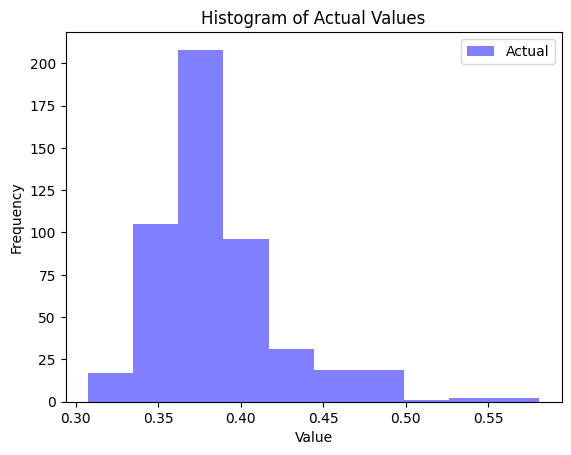

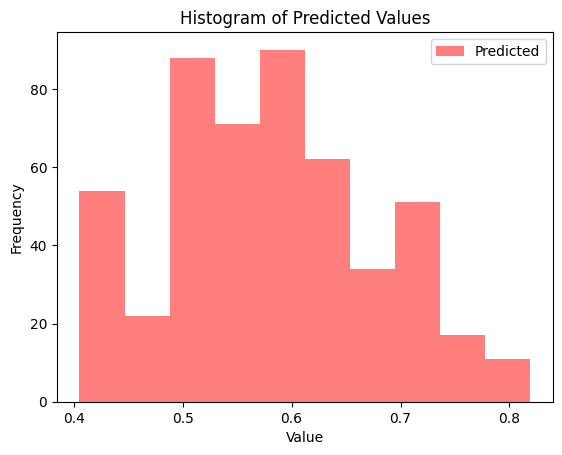

In [68]:

plt.hist(y_actual, bins=10, color='blue', alpha=0.5, label='Actual')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Values')
plt.legend()
plt.show()


plt.hist(y_pred, bins=10, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')
plt.legend()
plt.show()

## Métricas con  muchas probabilidad

### Predict mucha probabilidad

In [69]:
y_pred = random_forest_cls.predict(high_survival_changes_scaled_df.to_numpy())
y_actual = high_survival_changes_df["survival"]

### Métricas

In [70]:
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
mape = mean_absolute_percentage_error(y_actual, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_actual, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE)", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.2553573889070681
Mean Absolute Percentage Error (MAPE) 0.2998803641742611
Mean Squared Error (MSE): 0.07639039471412643
Root Mean Squared Error (RMSE): 0.2763881233232109
R-squared (R2) Score: -25.923289849248984


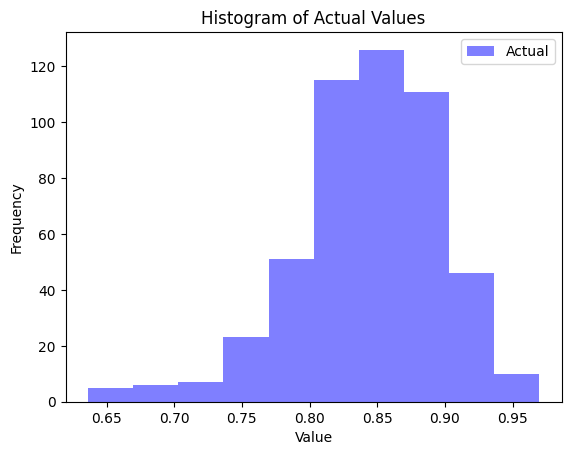

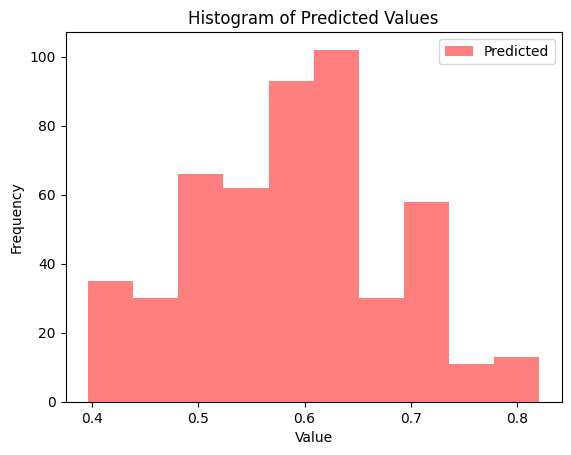

In [71]:

plt.hist(y_actual, bins=10, color='blue', alpha=0.5, label='Actual')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Values')
plt.legend()
plt.show()


plt.hist(y_pred, bins=10, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')
plt.legend()
plt.show()